In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def check_and_load_image(image_path):
    """
    Check if image path exists and loads the image.
    Returns None if the image cannot be loaded.
    """
    if not os.path.exists(image_path):
        print(f"File does not exist: {image_path}")
        return None
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        print(f"Failed to load image: {image_path}")
    return image

# Example usage
mask_path_nucleus = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/input/binary_mask_nucleus_non_arsenic/flattened_position_6_C0_mask.tiff'
image_path_dots = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/pml-merged-transformed-no-arsenic/flattened_position_6_C1.tif'
# merged_image_path = '/Users/pallavisingh/Downloads/flattened_position_1_C0.tif'

# Load images with error handling
image_dots = check_and_load_image(image_path_dots)
mask_nucleus = check_and_load_image(mask_path_nucleus)

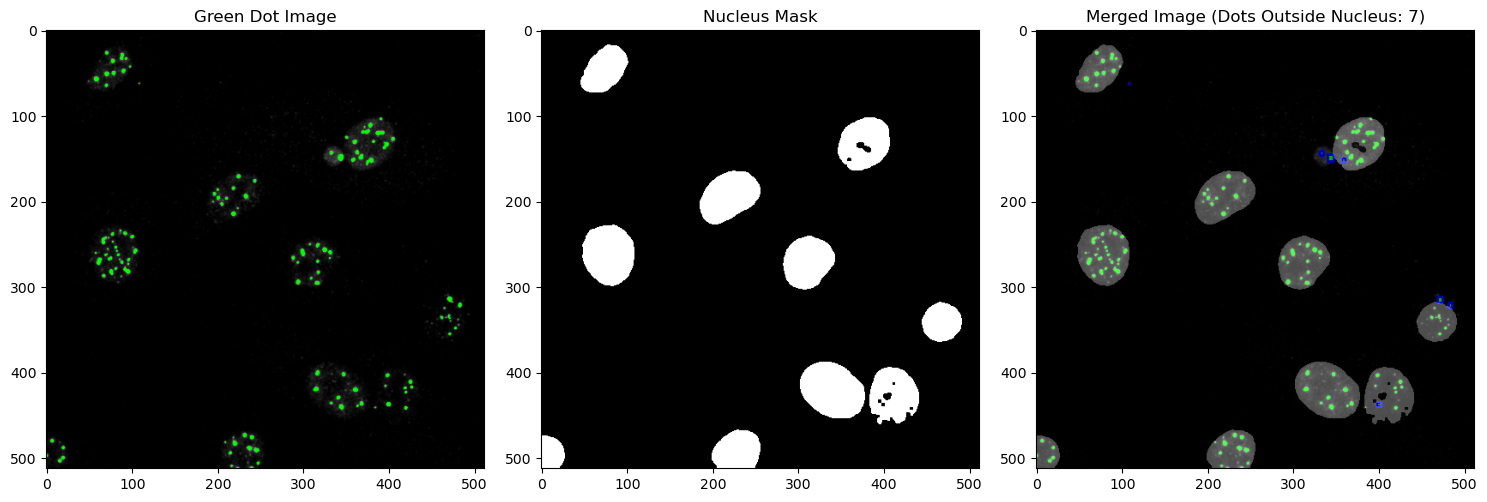

Total dots outside nucleus: 7
Dot details: [{'dot_id': 22, 'position': {'x': 399, 'y': 437}, 'width': 5, 'height': 5, 'area': 14}, {'dot_id': 44, 'position': {'x': 483, 'y': 322}, 'width': 4, 'height': 6, 'area': 11}, {'dot_id': 45, 'position': {'x': 471, 'y': 315}, 'width': 6, 'height': 7, 'area': 20}, {'dot_id': 97, 'position': {'x': 358, 'y': 152}, 'width': 5, 'height': 5, 'area': 11}, {'dot_id': 99, 'position': {'x': 343, 'y': 150}, 'width': 7, 'height': 8, 'area': 32}, {'dot_id': 100, 'position': {'x': 333, 'y': 144}, 'width': 4, 'height': 5, 'area': 9}, {'dot_id': 113, 'position': {'x': 108, 'y': 63}, 'width': 1, 'height': 1, 'area': 0}]


In [48]:

def merge_and_count_dots(image_path_dots, mask_path_nucleus):
    """
    Merges a green-dot image with a binary nucleus mask and counts dots outside the nucleus region.
    """
    # Load green dot image (assume dots on black background)
    image_dots = cv2.imread(image_path_dots, cv2.IMREAD_UNCHANGED)
    if image_dots is None:
        return "Error loading dot image.", None, 0
    
    # Convert dots image to 3-channel if single-channel
    if len(image_dots.shape) == 2:
        image_dots = cv2.cvtColor(image_dots, cv2.COLOR_GRAY2BGR)
    
    # Load binary nucleus mask (0 for background, 255 for nucleus)
    mask_nucleus = cv2.imread(mask_path_nucleus, cv2.IMREAD_GRAYSCALE)
    if mask_nucleus is None:
        return "Error loading nucleus mask.", None, 0
    
    # Threshold the dots image to isolate green dots
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    hsv_image_dots = cv2.cvtColor(image_dots, cv2.COLOR_BGR2HSV)
    green_mask = cv2.inRange(hsv_image_dots, lower_green, upper_green)
    
    # Find contours for dots
    contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Count dots that fall outside the nucleus mask
    dot_info = []
    count_outside_nucleus = 0
    for i, contour in enumerate(contours):
        # Calculate bounding box for each dot
        x, y, w, h = cv2.boundingRect(contour)
        cx, cy = x + w // 2, y + h // 2  # Center of the dot

        # Check if dot is outside the nucleus mask
        if mask_nucleus[cy, cx] == 0:  # Pixel value 0 means outside nucleus
            count_outside_nucleus += 1
            dot_info.append({
                'dot_id': i + 1,
                'position': {'x': cx, 'y': cy},
                'width': w,
                'height': h,
                'area': int(cv2.contourArea(contour))
            })
            # Draw bounding box around dots outside the nucleus
            cv2.rectangle(image_dots, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue box

    # Merge the mask and dot images for visualization
    merged_image = cv2.addWeighted(image_dots, 0.7, cv2.cvtColor(mask_nucleus, cv2.COLOR_GRAY2BGR), 0.3, 0)
    
    return merged_image, dot_info, count_outside_nucleus

# Example usage
mask_path_nucleus = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/input/binary_mask_nucleus_non_arsenic/flattened_position_6_C0_mask.tiff'
image_path_dots = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/pml-merged-transformed-no-arsenic/flattened_position_6_C1.tif'
# merged_image_path = '/Users/pallavisingh/Downloads/flattened_position_1_C0.tif'
merged_image, dot_info, count_outside = merge_and_count_dots(image_path_dots, mask_path_nucleus)

# Plotting the images for manual verification
plt.figure(figsize=(15, 5))

# Original dot image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path_dots), cv2.COLOR_BGR2RGB))
plt.title("Green Dot Image")

# Nucleus Mask
plt.subplot(1, 3, 2)
plt.imshow(cv2.imread(mask_path_nucleus, cv2.IMREAD_GRAYSCALE), cmap="gray")
plt.title("Nucleus Mask")

# Merged Image with Annotations
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
plt.title(f"Merged Image (Dots Outside Nucleus: {count_outside})")

plt.tight_layout()
plt.show()

# Print summary
print(f"Total dots outside nucleus: {count_outside}")
print("Dot details:", dot_info)


In [25]:
nucleus_mask_path = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/input/binary_mask_nucleus_high_arsenic/flattened_position_5_C0_mask.tiff'
image_path = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/pml-merged-transformed-high-arsenic/transformed_pml_green_dots_flattened_position_5_C1.tif'
# merged_image_path = '/Users/pallavisingh/Downloads/flattened_position_1_C0.tif'


merge_and_count_dots(image_path,nucleus_mask_path)
# print(f"Number of green dots outside the nucleus: {x}")

11

In [7]:
import json
import cv2
import numpy as np
import os
import re

# Define folder paths for masked and dot images
mask_folder_path ="/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/input/binary_mask_nucleus_high_arsenic"

dot_folder_path = "/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/input/Nuclei and pml training image data/merged-pml-high-arsenic"

# Load JSON data
json_path = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/input/annotations/arsenic_updated.json'
with open(json_path, 'r') as file:
    data = json.load(file)

# Function to classify dots as inside or outside nucleus
def classify_dots(dot_coords, mask_path_nucleus):
    mask_nucleus = cv2.imread(mask_path_nucleus, cv2.IMREAD_GRAYSCALE)
    if mask_nucleus is None:
        return "Error loading nucleus mask.", None

    classified_dots = []
    for dot in dot_coords:
        cx, cy = dot["position"]["x"], dot["position"]["y"]
        
        # Check if dot is outside the nucleus
        location = "outside_nucleus" if mask_nucleus[cy, cx] == 0 else "inside_nucleus"
        
        dot.update({
            'location': location,
            'width': dot.get('width', 1),
            'height': dot.get('height', 1),
            'area': dot.get('area', 1)
        })
        
        classified_dots.append(dot)
        
    return classified_dots




In [8]:
# Process each dot image
dot_pattern = r'flattened_position_(\d+)(?:-(\d+))?_C1'
updated_data = []

# Create a dictionary from JSON for easy access based on image name
data_dict = {entry["image_name"]: entry for entry in data}

# Process each dot image
for dot_file in os.listdir(dot_folder_path):
    match = re.match(dot_pattern, dot_file)
    if match:
        # Extract the main position ID and the optional second position ID
        position_id = match.group(1)
        second_id = match.group(2)
        
        # Construct the mask file name with or without the second ID
        mask_file = f'flattened_position_{position_id}'
        if second_id:
            mask_file += f'-{second_id}'
        mask_file += '_C0_mask.tif'
        
        dot_file_path = os.path.join(dot_folder_path, dot_file)
        mask_file_path = os.path.join(mask_folder_path, mask_file)
        
        # Ensure that both files exist
        if os.path.exists(dot_file_path) and os.path.exists(mask_file_path):
            # Use image name as key to find JSON entry
            image_name = f'flattened_position_{position_id}'
            if second_id:
                image_name += f'-{second_id}'
            image_name += '_C1'
            
            if image_name in data_dict:
                json_entry = data_dict[image_name]
                
                # Update dots with classification based on mask
                dot_coords = json_entry.get("dots", [])
                updated_dots = classify_dots(dot_coords, mask_file_path)
                json_entry["dots"] = updated_dots  # Update JSON entry dots
                
                # Append updated entry to the list
                updated_data.append(json_entry)

# Save the updated JSON
output_json_path = '/Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/input/annotations/arsenic_updated.json'
with open(output_json_path, 'w') as file:
    json.dump(updated_data, file, indent=4)

print("Updated JSON file saved:", output_json_path)


Updated JSON file saved: /Users/pallavisingh/Library/CloudStorage/OneDrive-SharedLibraries-DalhousieUniversity/Priyadharshini Sridharan - Images from Dellaire Lab/input/annotations/arsenic_updated.json
